In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('RawData.csv') 
raw_data.head()

,Title,Price,Availability,Size,Dispatch Time,Product Type,Signed By,Presentation Type,Player Name
0,UNSIGNED Sergio Aguero Photo In Black Wooden F...,£49.99,In stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Unsigned,Framed,Sergio Aguero
1,UNSIGNED Sergio Aguero Photo In Black Wooden F...,£49.99,In stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Unsigned,Framed,Sergio Aguero
2,UNSIGNED Sergio Aguero Photo In Black Wooden F...,£49.99,In stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Unsigned,Framed,Sergio Aguero
3,UNSIGNED Sergio Aguero Photo In Black Wooden F...,£49.99,In stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Unsigned,Framed,Sergio Aguero
4,UNSIGNED Sergio Aguero Photo In Black Wooden F...,£49.99,In stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Unsigned,Framed,Sergio Aguero


In [3]:
# Remove unsigned items
clean_data = raw_data[raw_data['Signed By'] != 'Unsigned'].copy()

# Convert convert Price to numeric
clean_data['Price'] = clean_data['Price'].str.replace('£', '').str.replace(',', '').astype(float)

print("The total number of signed items is", len(clean_data))
clean_data.head()

The total number of signed items is 653


,Title,Price,Availability,Size,Dispatch Time,Product Type,Signed By,Presentation Type,Player Name
6,Sergio Aguero Official Manchester City Back Si...,467.49,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
7,Sergio Aguero Official UEFA Champions League B...,649.99,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
8,Sergio Aguero Official UEFA Champions League B...,599.99,Out of stock,875mm (H) x 785mm (W) x 38mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
9,Sergio Aguero Back Signed Manchester City 2019...,299.99,Out of stock,NaN,Usually dispatched within 2-3 working days,Signed shirts,Sergio Aguero,Unframed,Sergio Aguero
10,Sergio Aguero Official UEFA Champions League B...,699.99,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero


**Identify the signed item with the highest price and who the item was signed by from our list of players with surnames starting with A-C**

In [4]:
# Find the item with the highest price
max_price_index = clean_data['Price'].idxmax()

# Extract the player name and item details
max_price_player = clean_data.loc[max_price_index, 'Player Name']
max_price_item = clean_data.loc[max_price_index, 'Title']
max_price = clean_data.loc[max_price_index, 'Price']

print(f"The player {max_price_player} signed the item '{max_price_item}' with the highest price of £{max_price}.")

The player Sergio Busquets signed the item 'Andres Iniesta, Xavi and Sergio Busquets Official FC Barcelona Front Signed and Framed 2013-14 Away Shirt' with the highest price of £2999.99.


**Identify the player who's signed items' prices have the highest avergae - including collaborations - ie. item signed by more than one player**

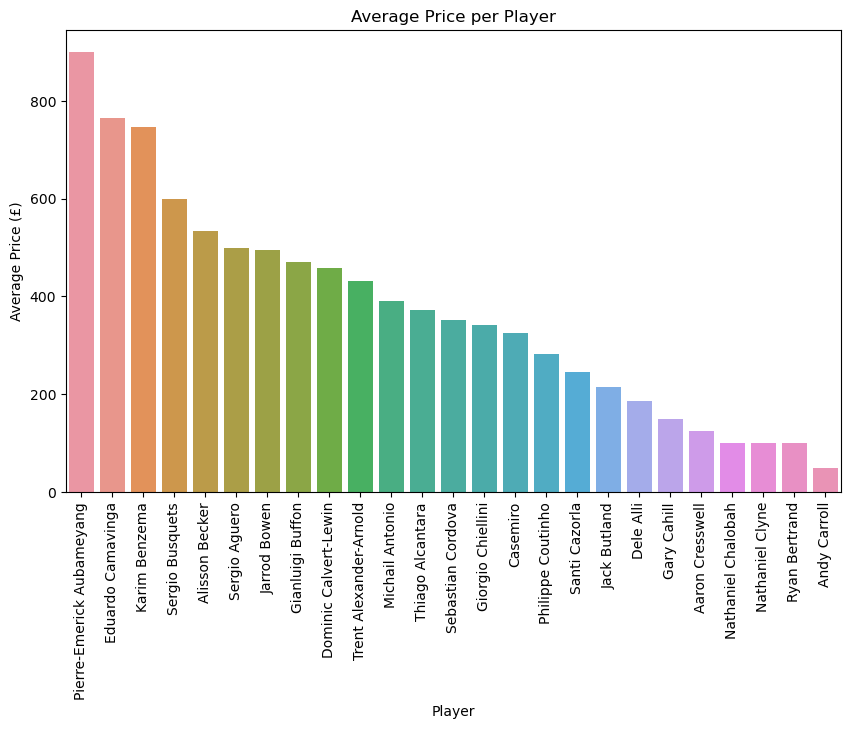

In [5]:
# Group by 'Player' and calculate the average price
average_price_per_player = clean_data.groupby('Player Name')['Price'].mean().reset_index()

# Rename columns
average_price_per_player.columns = ['Player Name', 'Average Price']

# Sort values to identify the highest average more easily with a side by side comparison
average_price_per_player = average_price_per_player.sort_values(by='Average Price', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_per_player, x='Player Name', y='Average Price')
plt.xticks(rotation=90)
plt.title('Average Price per Player')
plt.xlabel('Player')
plt.ylabel('Average Price (£)')
plt.show()

In [6]:
# Find the player with the highest average price
max_avg_price_player = average_price_per_player.loc[average_price_per_player['Average Price'].idxmax()]

# Extract the player name and average price
max_avg_price_player_name = max_avg_price_player['Player Name']
max_avg_price = max_avg_price_player['Average Price']

print(f"The player {max_avg_price_player_name} has the highest average price of £{max_avg_price:.2f} per signed item.")

The player Pierre-Emerick Aubameyang has the highest average price of £899.99 per signed item.


However, collaborations and items signed by teammates can raise the price without this being credit of the signatures of the player's in question. Notice in the graphs bellow how item signed only by the players in question are far lower than those signed by multiple people. This innevitably increases the players' overall price average for their signed items, but it is not necessarily merit of their own signature. 

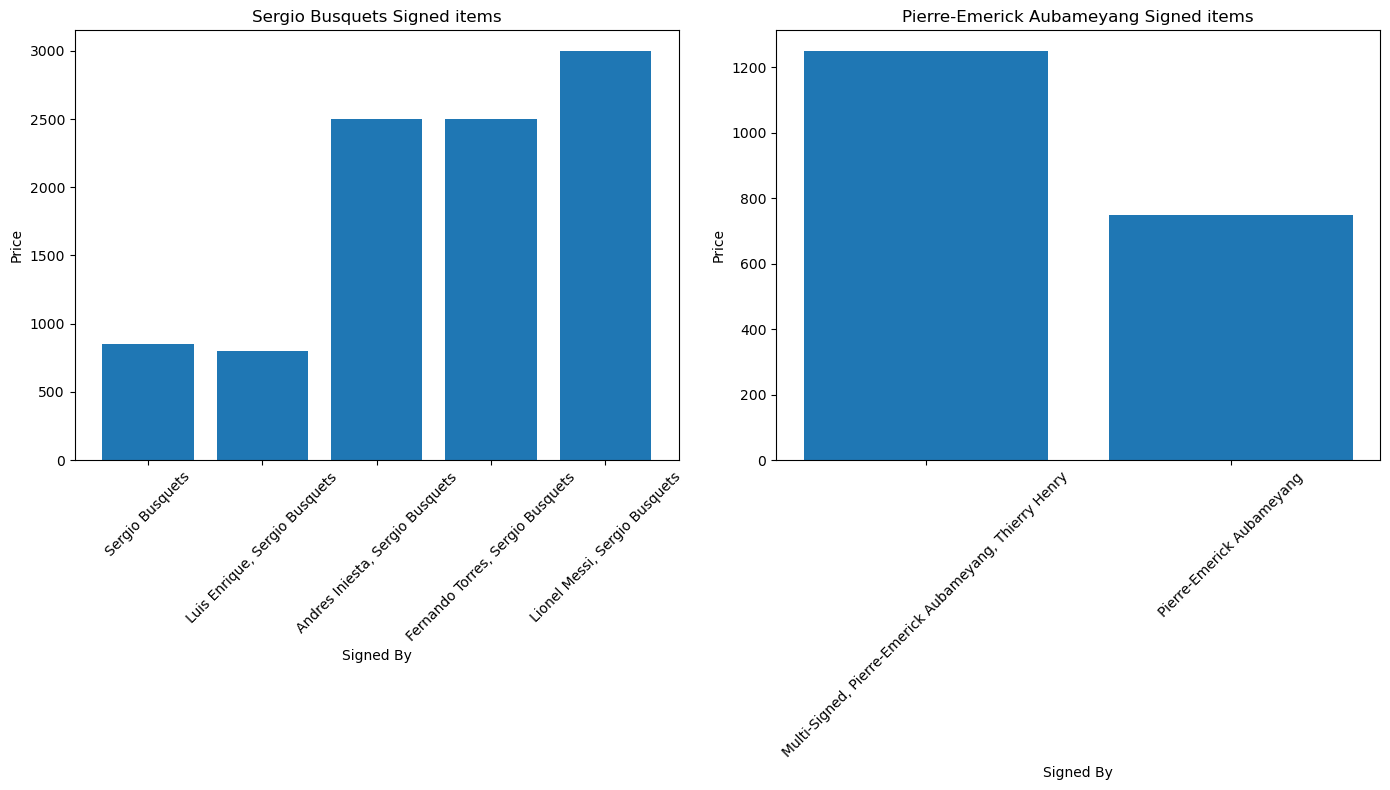

In [7]:
# Filter rows where "Signed By" column contains "Sergio Busquets"
busquets_data = clean_data[clean_data['Signed By'].str.contains("Sergio Busquets", na=False)]

# Filter rows where "Signed By" column contains "Pierre-Emerick Aubameyang"
pierre_data = clean_data[clean_data['Player Name'].str.contains("Pierre-Emerick Aubameyang", na=False)]

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot for Sergio Busquets
axes[0].bar(busquets_data['Signed By'], busquets_data['Price'])
axes[0].set_xlabel('Signed By')
axes[0].set_ylabel('Price')
axes[0].set_title('Sergio Busquets Signed items')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Pierre-Emerick Aubameyang
axes[1].bar(pierre_data['Signed By'], pierre_data['Price'])
axes[1].set_xlabel('Signed By')
axes[1].set_ylabel('Price')
axes[1].set_title('Pierre-Emerick Aubameyang Signed items')
axes[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

**Removing items signed by multiple players or players outside the list of surnames from A-C**

In [8]:
signed_by = clean_data['Signed By'].value_counts()
print(signed_by)

Signed By
Dele Alli                                                    117
Gianluigi Buffon                                             103
Casemiro                                                      60
Sergio Busquets                                               56
Trent Alexander-Arnold                                        52
Giorgio Chiellini                                             48
Karim Benzema                                                 39
Thiago Alcantara                                              37
Philippe Coutinho                                             32
Sergio Aguero                                                 24
Jarrod Bowen                                                  14
Eduardo Camavinga                                              7
Michail Antonio                                                6
Jack Butland                                                   6
Sebastian Cordova                                              4
Santi Cazorla  

In [9]:
m_data = clean_data[clean_data['Player Name'] != clean_data['Signed By']]
print("The number of item who were signed by either more than one player or by players outside the list is", len(m_data))
m_data.head(3)

The number of item who were signed by either more than one player or by players outside the list is 26


,Title,Price,Availability,Size,Dispatch Time,Product Type,Signed By,Presentation Type,Player Name
33,Thiago Alcantara & Luis Enrique Signed FC Barc...,299.99,In stock,NaN,Usually dispatched within 8-10 working days,Signed photos,Luis Enrique,Framed,Thiago Alcantara
57,Cesar Azpilicueta & Thiago Alcantara Signed Sh...,999.99,Out of stock,1200mm (W) x 900mm (H) x 30mm (D),Usually dispatched within 8-10 working days,Signed shirts,"Cesar Azpilicueta, Thiago Alcantara",Framed,Thiago Alcantara
58,Thiago Alcantara & Pedri Signed Spain Shirts I...,899.99,Out of stock,1200mm (W) x 900mm (H) x 30mm (D),Usually dispatched within 8-10 working days,Signed shirts,"Pedri, Thiago Alcantara",Framed,Thiago Alcantara


In [10]:
# Filter the dataset to only keep relevant items
filtered_data = clean_data[clean_data['Player Name'] == clean_data['Signed By']]

print("The number of signed items only by the relevant players is", len(filtered_data))
filtered_data

The number of signed items only by the relevant players is 627


,Title,Price,Availability,Size,Dispatch Time,Product Type,Signed By,Presentation Type,Player Name
6,Sergio Aguero Official Manchester City Back Si...,467.49,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
7,Sergio Aguero Official UEFA Champions League B...,649.99,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
8,Sergio Aguero Official UEFA Champions League B...,599.99,Out of stock,875mm (H) x 785mm (W) x 38mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
9,Sergio Aguero Back Signed Manchester City 2019...,299.99,Out of stock,NaN,Usually dispatched within 2-3 working days,Signed shirts,Sergio Aguero,Unframed,Sergio Aguero
10,Sergio Aguero Official UEFA Champions League B...,699.99,Out of stock,920mm (H) x 1120mm (W) x 20mm (D),Usually dispatched within 8-10 working days,Signed shirts,Sergio Aguero,Framed,Sergio Aguero
...,...,...,...,...,...,...,...,...,...
687,Philippe Coutinho Signed and Liverpool Framed ...,399.99,Out of stock,NaN,Usually dispatched within 8-10 working days,Signed boots,Philippe Coutinho,Framed,Philippe Coutinho
688,Philippe Coutinho Signed Yellow and Orange Nik...,234.99,Out of stock,340mm (W) x 220mm (H) x 110mm (D),Usually dispatched within 2-3 working days,Signed boots,Philippe Coutinho,Deluxe Packaged,Philippe Coutinho
689,Philippe Coutinho Signed Yellow and Orange Nik...,199.99,Out of stock,NaN,Usually dispatched within 2-3 working days,Signed boots,Philippe Coutinho,Unframed,Philippe Coutinho
690,Aaron Cresswell Signed England Photo,149.99,In stock,NaN,Usually dispatched within 2-3 working days,Signed photos,Aaron Cresswell,Unframed,Aaron Cresswell


**Identify the signed item by only one of the players with surname starting with A-C with the highest price and who the item was signed by**

In [11]:
# Find the item with the highest price
f_max_price_index = filtered_data['Price'].idxmax()

# Extract the player name and item details
f_max_price_player = filtered_data.loc[f_max_price_index, 'Player Name']
f_max_price_item = filtered_data.loc[f_max_price_index, 'Title']
f_max_price = filtered_data.loc[f_max_price_index, 'Price']

print(f"The player {f_max_price_player} signed the item '{f_max_price_item}' with the highest price of £{f_max_price}.")

The player Karim Benzema signed the item 'Karim Benzema Back Signed Real Madrid CF Home Shirt In Super Premium Frame: 2022 Ballon d'Or Winner' with the highest price of £2499.99.


**Identify the player with the highest price average for item signed uniquely by him from the players with surname starting with A-C with the highest price and who the item was signed by**

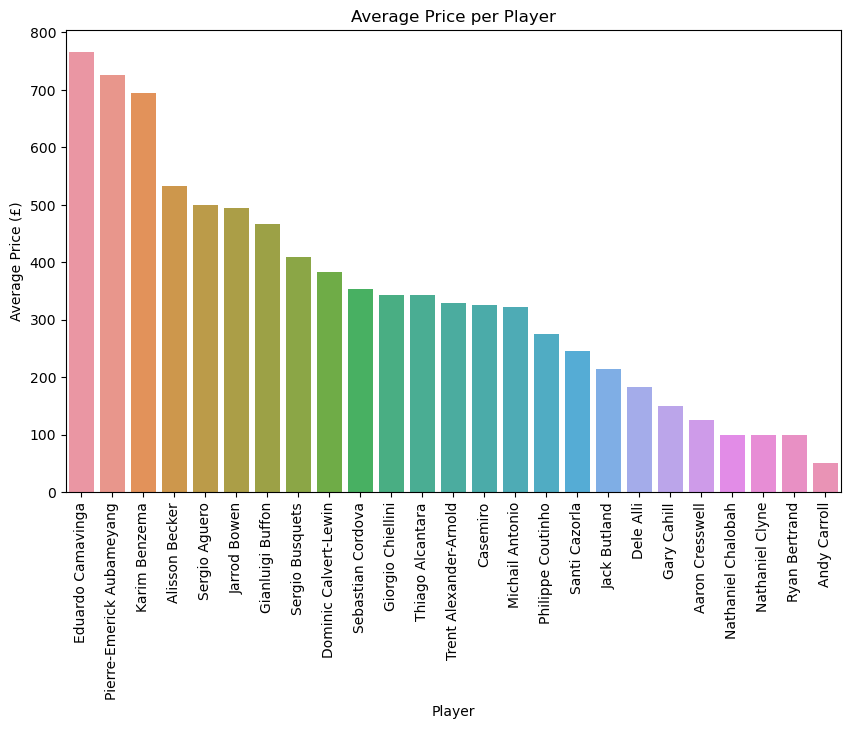

In [12]:
# Group by 'Player' and calculate the average price
f_average_price_per_player = filtered_data.groupby('Player Name')['Price'].mean().reset_index()

# Rename columns for clarity
f_average_price_per_player.columns = ['Player Name', 'Average Price']

# Sort by name for easier reference back to website
f_average_price_per_player = f_average_price_per_player.sort_values(by='Average Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=f_average_price_per_player, x='Player Name', y='Average Price')
plt.xticks(rotation=90)
plt.title('Average Price per Player')
plt.xlabel('Player')
plt.ylabel('Average Price (£)')
plt.show()

In [13]:
# Find the player with the highest average price
f_max_avg_price_player = f_average_price_per_player.loc[f_average_price_per_player['Average Price'].idxmax()]

# Extract the player name and average price
f_max_avg_price_player_name = f_max_avg_price_player['Player Name']
f_max_avg_price = f_max_avg_price_player['Average Price']

print(f"The player {f_max_avg_price_player_name} has the highest average price of £{f_max_avg_price:.2f} per signed item.")

The player Eduardo Camavinga has the highest average price of £765.70 per signed item.


**It may be the case that items - such as shirts, in general sell for a higher price than say, cards. So it is important to do the comparison and study for each of these separately.**

In [14]:
product_type = filtered_data['Product Type'].value_counts()
print(product_type)

Product Type
Signed shirts               452
Signed photos                94
Signed boots                 42
Signed balls                 16
Signed cards and plaques     14
Signed books                  3
Signed gloves                 3
Miscellaneous                 3
Name: count, dtype: int64


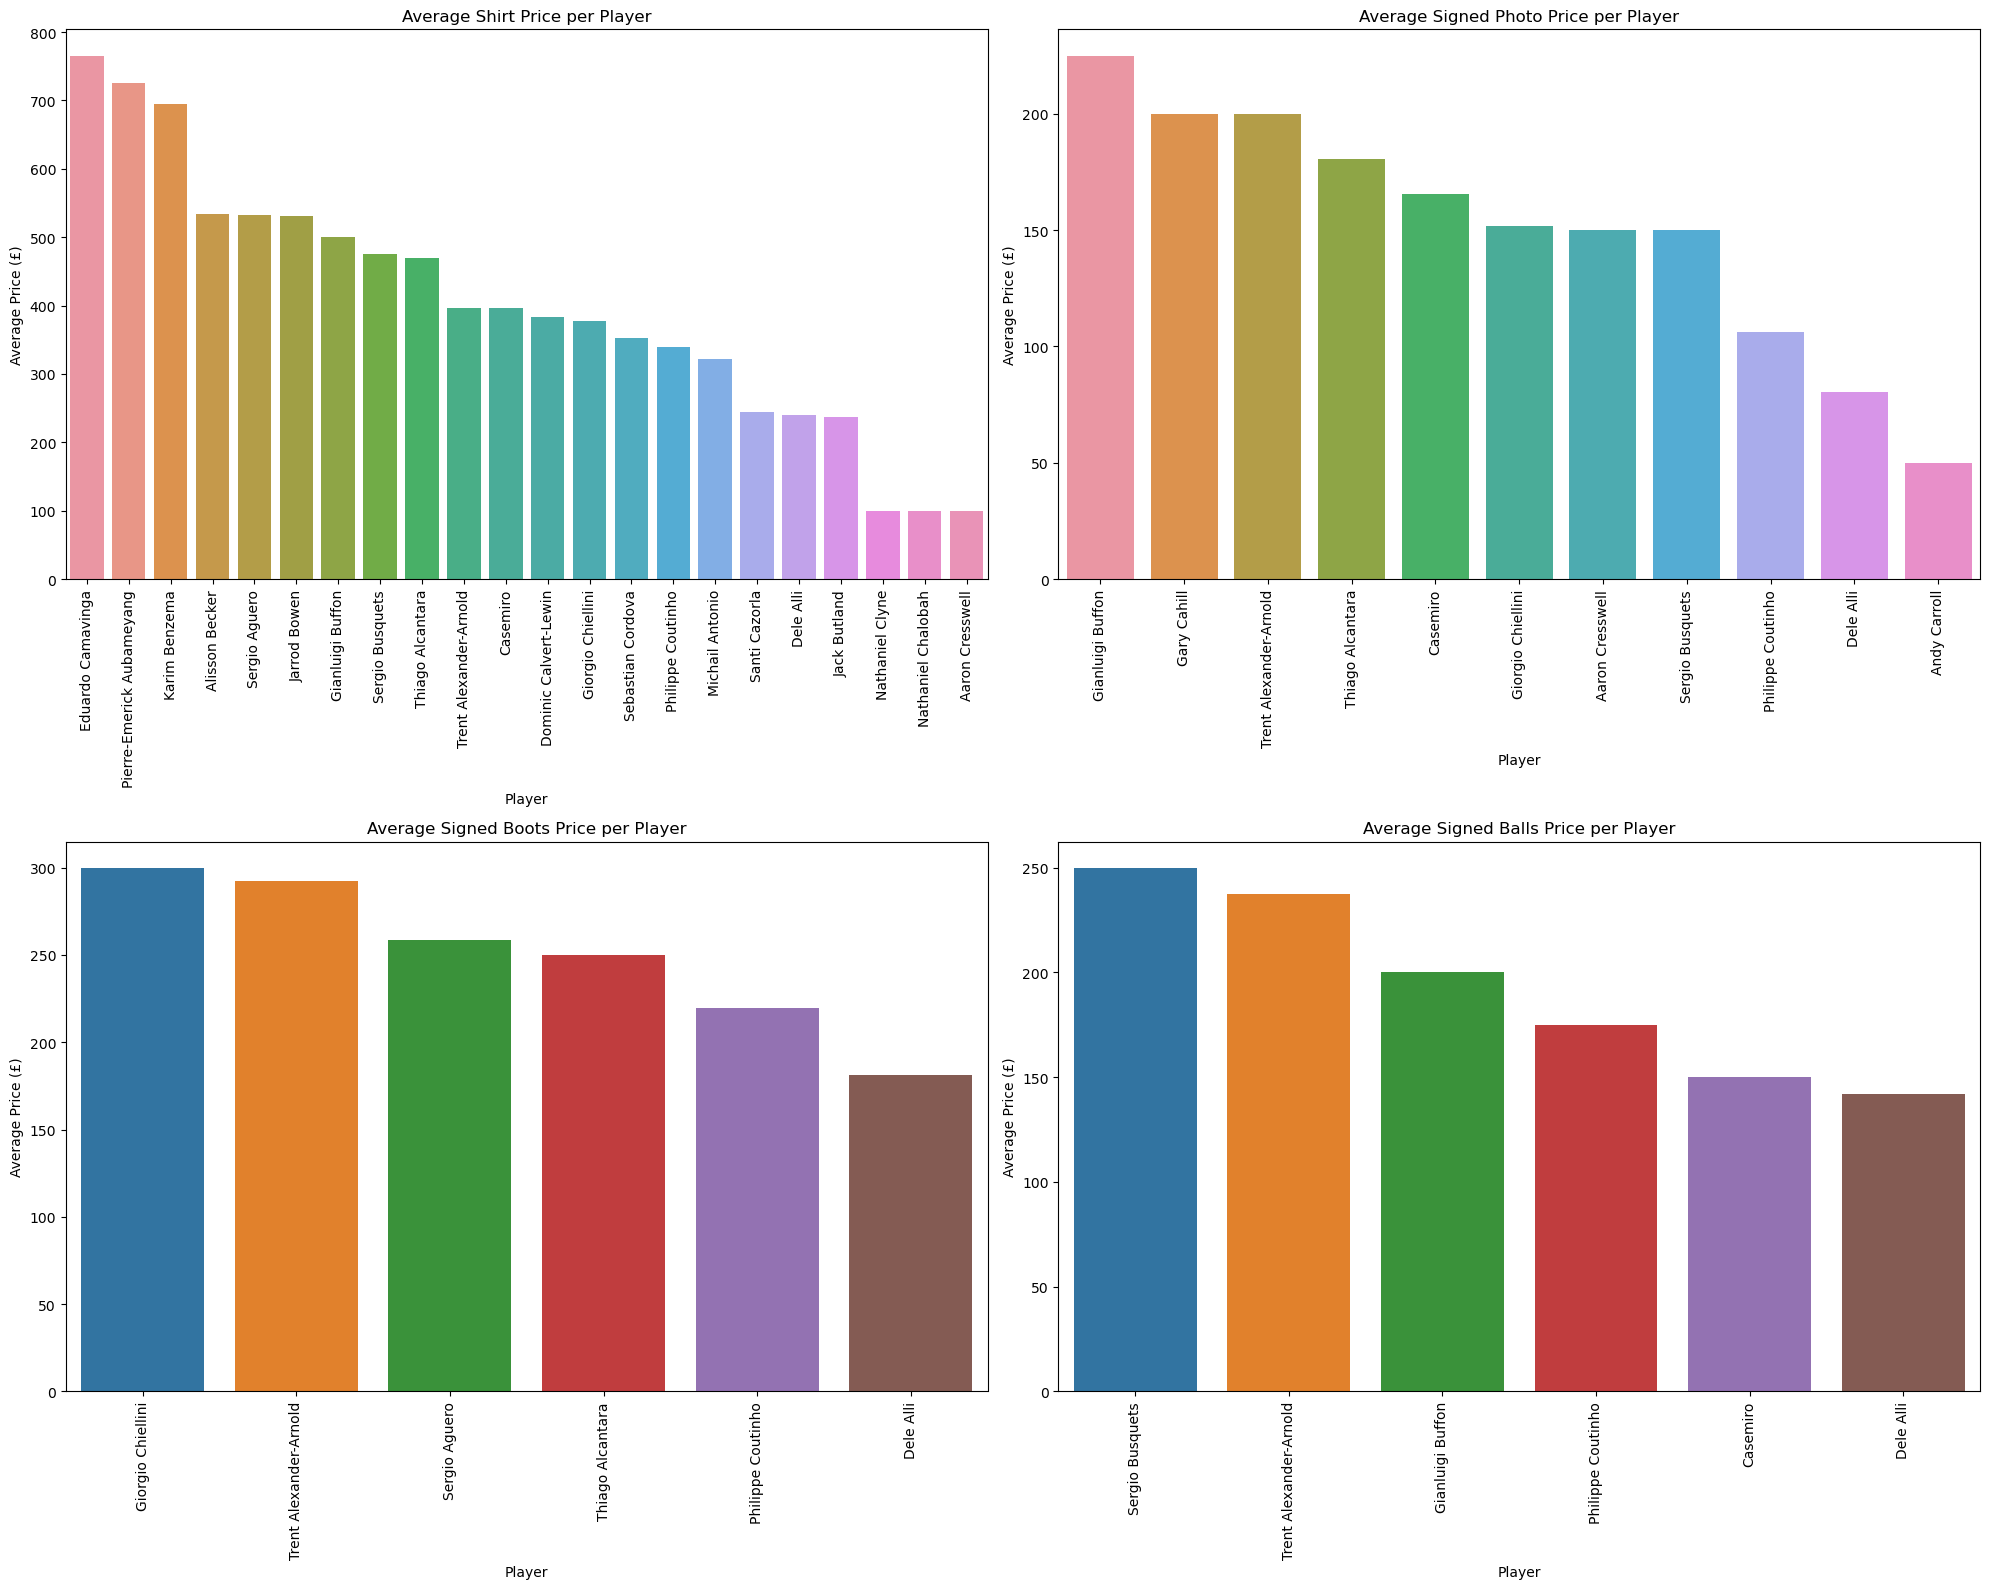

In [15]:
#Define and prepate the dataframes to be plotted

shirts_data = filtered_data[filtered_data['Product Type'] == "Signed shirts"]
average_shirt_price_per_player = shirts_data.groupby('Player Name')['Price'].mean().reset_index()
average_shirt_price_per_player.columns = ['Player Name', 'Average Price']
average_shirt_price_per_player = average_shirt_price_per_player.sort_values(by='Average Price', ascending=False)

photos_data = filtered_data[filtered_data['Product Type'] == "Signed photos"]
average_photos_price_per_player = photos_data.groupby('Player Name')['Price'].mean().reset_index()
average_photos_price_per_player.columns = ['Player Name', 'Average Price']
average_photos_price_per_player = average_photos_price_per_player.sort_values(by='Average Price', ascending=False)

boots_data = filtered_data[filtered_data['Product Type'] == "Signed boots"]
average_boots_price_per_player = boots_data.groupby('Player Name')['Price'].mean().reset_index()
average_boots_price_per_player.columns = ['Player Name', 'Average Price']
average_boots_price_per_player = average_boots_price_per_player.sort_values(by='Average Price', ascending=False)

ball_data = filtered_data[filtered_data['Product Type'] == "Signed balls"]
average_ball_price_per_player = ball_data.groupby('Player Name')['Price'].mean().reset_index()
average_ball_price_per_player.columns = ['Player Name', 'Average Price']
average_ball_price_per_player = average_ball_price_per_player.sort_values(by='Average Price', ascending=False)


# Define the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot for Signed shirts
sns.barplot(data=average_shirt_price_per_player, x='Player Name', y='Average Price', ax=axes[0, 0])
axes[0, 0].set_title('Average Shirt Price per Player')
axes[0, 0].set_xlabel('Player')
axes[0, 0].set_ylabel('Average Price (£)')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for Signed photos
sns.barplot(data=average_photos_price_per_player, x='Player Name', y='Average Price', ax=axes[0, 1])
axes[0, 1].set_title('Average Signed Photo Price per Player')
axes[0, 1].set_xlabel('Player')
axes[0, 1].set_ylabel('Average Price (£)')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for Signed boots
sns.barplot(data=average_boots_price_per_player, x='Player Name', y='Average Price', ax=axes[1, 0])
axes[1, 0].set_title('Average Signed Boots Price per Player')
axes[1, 0].set_xlabel('Player')
axes[1, 0].set_ylabel('Average Price (£)')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for Signed balls
sns.barplot(data=average_ball_price_per_player, x='Player Name', y='Average Price', ax=axes[1, 1])
axes[1, 1].set_title('Average Signed Balls Price per Player')
axes[1, 1].set_xlabel('Player')
axes[1, 1].set_ylabel('Average Price (£)')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Clearly, the shirts are what influence most heavily the final averages and conclusions, as they are the most popular signed item - that is, it is the type of item with the highest quantity and also the most expesive type of item on average. 

Finally, one can turn to **look at the comparisons in price of each player's most expensive item** and identify a pattern or significant outlier in that context. 

In [16]:
# Group by 'Player Name' and find the index of the highest priced item for each player
highest_price_indices = filtered_data.groupby('Player Name')['Price'].idxmax()

# Extract the rows corresponding to the highest priced items for each player
highest_price_items = filtered_data.loc[highest_price_indices]

highest_price_items.head()

,Title,Price,Availability,Size,Dispatch Time,Product Type,Signed By,Presentation Type,Player Name
690,Aaron Cresswell Signed England Photo,149.99,In stock,NaN,Usually dispatched within 2-3 working days,Signed photos,Aaron Cresswell,Unframed,Aaron Cresswell
274,Alisson Becker Back Signed Liverpool 2019-20 G...,549.99,Out of stock,1015mm (W) x 750mm (H) x 25mm (D),Usually dispatched within 8-10 working days,Signed shirts,Alisson Becker,Framed,Alisson Becker
527,Andy Carroll Signed Newcastle United Photo In ...,74.99,Out of stock,570mm (H) x 470mm (W) x 30mm (D),Usually dispatched within 3-4 working days,Signed photos,Andy Carroll,Framed,Andy Carroll
539,Casemiro Official FIFA World Cup Back Signed a...,749.99,In stock,885mm (H) x 780mm (W) x 30mm (D),Usually dispatched within 8-10 working days,Signed shirts,Casemiro,Framed,Casemiro
146,Dele Alli Official FIFA World Cup Back Signed ...,699.99,In stock,885mm (H) x 780mm (W) x 30mm (D),Fast dispatch in 3-4 working days sent via DHL...,Signed shirts,Dele Alli,Framed,Dele Alli


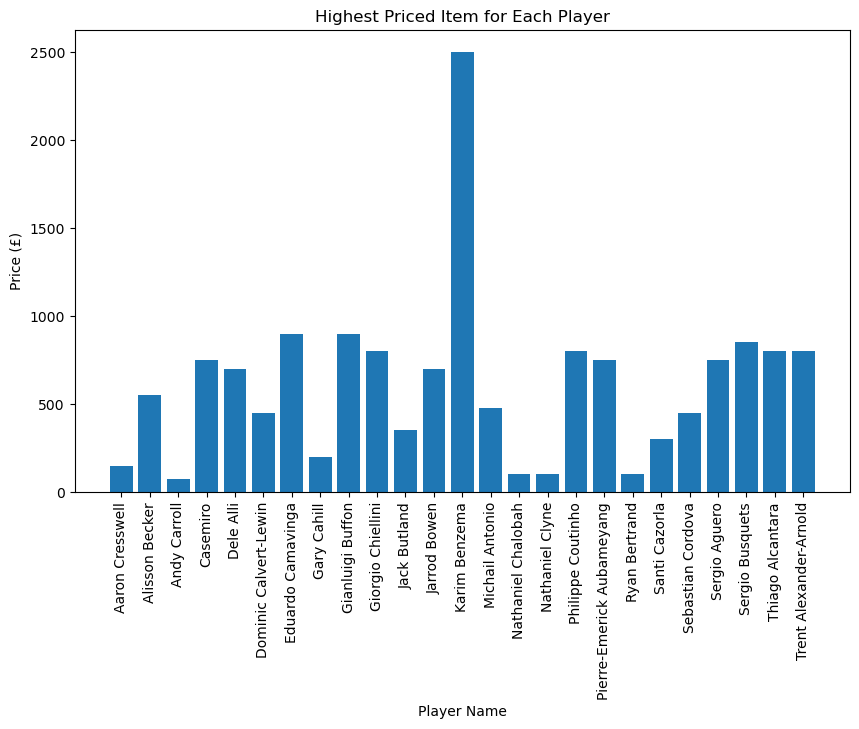

In [17]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(highest_price_items['Player Name'], highest_price_items['Price'])
plt.xlabel('Player Name')
plt.ylabel('Price (£)')
plt.title('Highest Priced Item for Each Player')
plt.xticks(rotation=90)
plt.show()

**The disparity between the highest selling items plot above and the previous average prices per player may be explained by the following.** 

It might be the case that some players have a higher average merely because they have less items and they all happen to be of decent value, while another player who have signed items priced equally if not higher, also have cheaper items displayed, thus considerably lowering their average.**

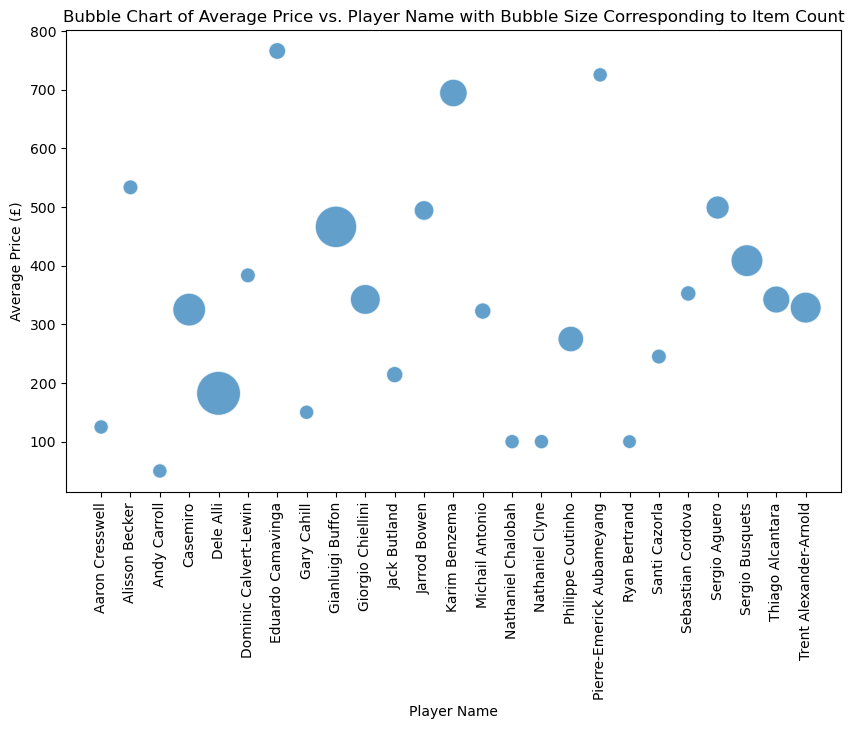

In [18]:
# Calculate the average price per player
f_average_price_per_player = filtered_data.groupby('Player Name')['Price'].mean().reset_index()

# Calculate the number of items each player has
item_counts_per_player = filtered_data['Player Name'].value_counts().reset_index()
item_counts_per_player.columns = ['Player Name', 'Item Count']

# Merge the average price and item count dataframes
merged_data = pd.merge(f_average_price_per_player, item_counts_per_player, on='Player Name')

# Create the bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Player Name', y='Price', size='Item Count', sizes=(100, 1000), alpha = 0.7, legend=False)
plt.xlabel('Player Name')
plt.ylabel('Average Price (£)')
plt.title('Bubble Chart of Average Price vs. Player Name with Bubble Size Corresponding to Item Count')
plt.xticks(rotation=90)
plt.show()

Karim Benzema might be the player with the most expensive signed item, but he has a larger number of signed items for sale which may have a lower price due to the type of product (eg. photos, cards, books) which tend to have lower selling prices. In contrast, Camavinga has less items and they are all t-shirt - the most expensive type of item on average. 

Drawing a conclusion on which footballer’s signature is worth the most from current stars with surnames A-C is a highly context-dependent matter, as evident from the different conclusion that may have been drawn at the different stages of this study. But I would take the "Highest Priced Item for Each Player" to be a good place to draw a conclusion as the difference is so vast between Benzema and all other players and the fact that this plot considers only the TOP signed product of each player. 